In [377]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [378]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [381]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,567.000000,537.000000,345.000000,198.000000,561.000000,572.000000,572.000000,572.000000
mean,4.106643,121.647266,73.150838,29.356522,156.934343,32.327629,0.459121,34.043706,0.358392
std,3.446995,30.132084,12.347184,10.433503,119.066934,6.735437,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,22.000000,77.500000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,129.500000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,185.000000,36.600000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


In [382]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Remoção de colunas não utilizadas

In [383]:
df.pop('Pregnancies')
# df.pop('Age')
df.pop('Insulin')

0        NaN
1        NaN
2        NaN
3      168.0
4        NaN
       ...  
567      NaN
568      NaN
569    112.0
570      NaN
571      NaN
Name: Insulin, Length: 572, dtype: float64

### Preenchimento da coluna Glucose

In [384]:
mean_glucose_sick = df[df['Outcome'] == 1]['Glucose'].mean().round(2)
mean_glucose_healthy = df[df['Outcome'] == 0]['Glucose'].mean().round(2)

print(f"Mean glucose level for sick patients: {mean_glucose_sick}")
print(f"Mean glucose level for healthy patients: {mean_glucose_healthy}")

# Replace missing values with the mean glucose level for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['Glucose'].isnull()), 'Glucose'] = mean_glucose_sick
df.loc[(df['Outcome'] == 0) & (df['Glucose'].isnull()), 'Glucose'] = mean_glucose_healthy

Mean glucose level for sick patients: 141.01
Mean glucose level for healthy patients: 110.85


### Preenchimento da coluna Insulin

In [385]:
# mean_insulin_sick = df[df['Outcome'] == 1]['Insulin'].mean().round(2)
# mean_insulin_healthy = df[df['Outcome'] == 0]['Insulin'].mean().round(2)

# print(f"Mean insulin level for sick patients: {mean_insulin_sick}")
# print(f"Mean insulin level for healthy patients: {mean_insulin_healthy}")

# # Replace missing values with the mean insulin level for the corresponding outcome
# df.loc[(df['Outcome'] == 1) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_sick
# df.loc[(df['Outcome'] == 0) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_healthy

# df.head()

### Preenchimento da coluna SkinThickness

In [386]:
mean_skin_thickness_sick = df[df['Outcome'] == 1]['SkinThickness'].mean().round(1)
mean_skin_thickness_healthy = df[df['Outcome'] == 0]['SkinThickness'].mean().round(1)

print(f"Mean skin thickness for sick patients: {mean_skin_thickness_sick}")
print(f"Mean skin thickness for healthy patients: {mean_skin_thickness_healthy}")

# Replace missing values with the mean skin thickness for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['SkinThickness'].isnull()), 'SkinThickness'] = mean_skin_thickness_sick
df.loc[(df['Outcome'] == 0) & (df['SkinThickness'].isnull()), 'SkinThickness'] = mean_skin_thickness_healthy

Mean skin thickness for sick patients: 33.0
Mean skin thickness for healthy patients: 27.5


### Preenchimento da coluna BloodPressure

In [387]:
mean_blodd_pressure_sick = df[df['Outcome'] == 1]['BloodPressure'].mean().round(2)
mean_blodd_pressure_healthy = df[df['Outcome'] == 0]['BloodPressure'].mean().round(2)

print(f"Mean blood pressure for sick patients: {mean_blodd_pressure_sick}")
print(f"Mean blood pressure for healthy patients: {mean_blodd_pressure_healthy}")

# Replace missing values with the mean blood pressure for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['BloodPressure'].isnull()), 'BloodPressure'] = mean_blodd_pressure_sick
df.loc[(df['Outcome'] == 0) & (df['BloodPressure'].isnull()), 'BloodPressure'] = mean_blodd_pressure_healthy

Mean blood pressure for sick patients: 74.81
Mean blood pressure for healthy patients: 72.25


### Preenchimento da coluna BMI

In [388]:
mean_bmi = df['BMI'].mean().round(2)

print(f"Mean BMI: {mean_bmi}")

# Replace missing values with the mean BMI
df['BMI'].fillna(mean_bmi, inplace=True)

Mean BMI: 32.33


C:\Users\ANCHIETA\AppData\Local\Temp\ipykernel_11812\2491172513.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(mean_bmi, inplace=True)


In [389]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

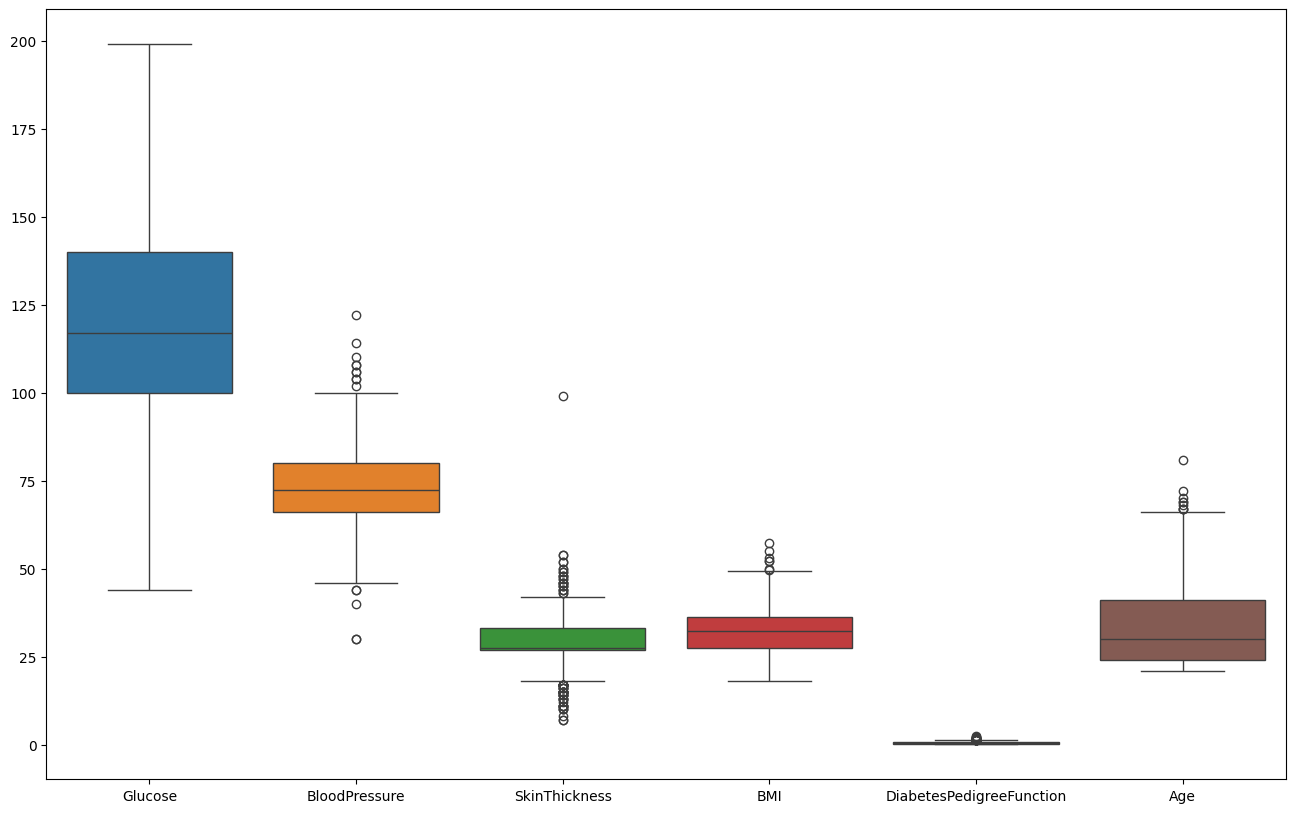

In [390]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df.drop(columns=['Outcome']))
plt.show()

In [391]:
df = df[df['SkinThickness'] < 70]
df = df[df['BloodPressure'] < 115]
df = df[df['BloodPressure'] > 40]

df = df[df['SkinThickness'] < 45]
df = df[df['SkinThickness'] > 15]




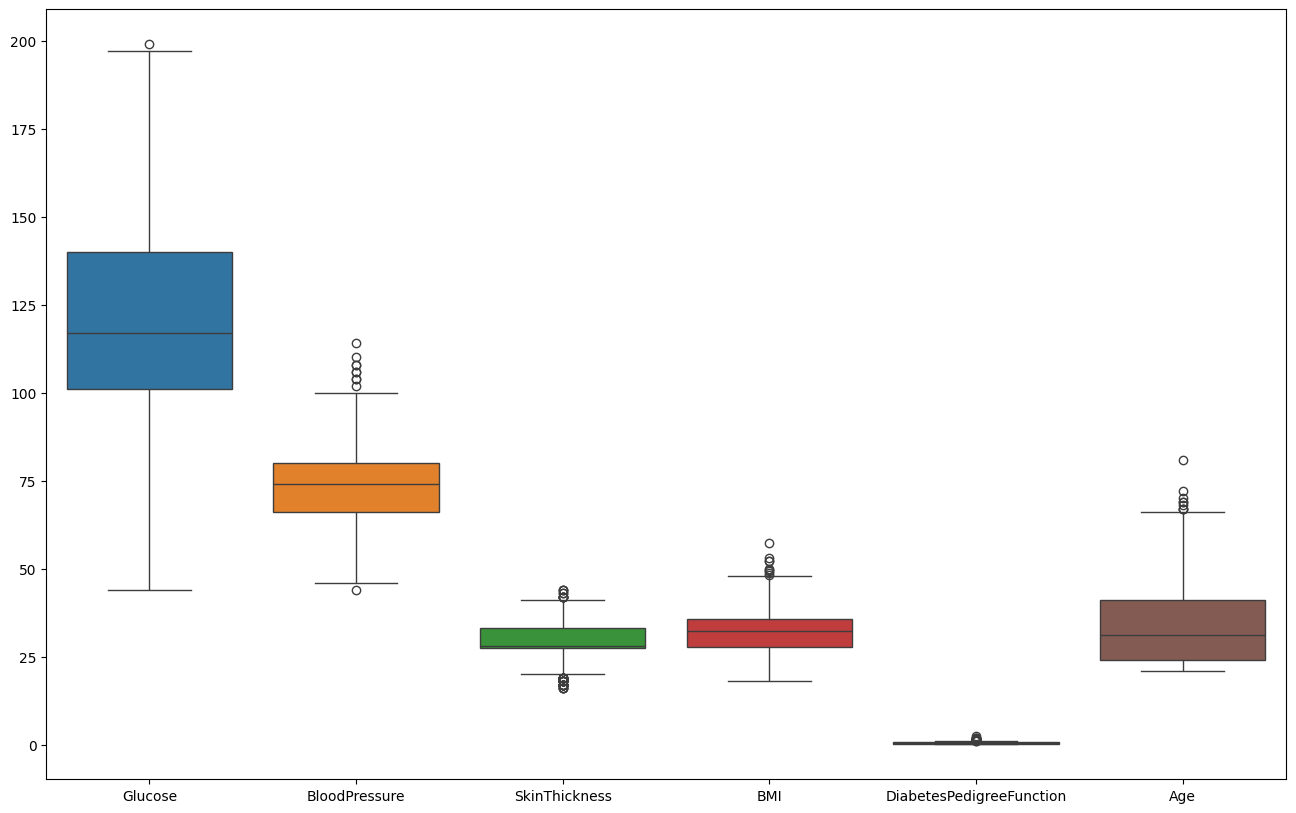

In [392]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df.drop(columns=['Outcome']))
plt.show()

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 571
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   517 non-null    float64
 1   BloodPressure             517 non-null    float64
 2   SkinThickness             517 non-null    float64
 3   BMI                       517 non-null    float64
 4   DiabetesPedigreeFunction  517 non-null    float64
 5   Age                       517 non-null    int64  
 6   Outcome                   517 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 32.3 KB


## Normalização

In [394]:
df_normalized = df.copy() 
  
# apply normalization techniques 
for column in df_normalized.columns: 
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())     
  
df_normalized.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.670968,0.400000,0.678571,0.393862,0.243892,0.483333,1.0
1,0.264516,0.314286,0.464286,0.214834,0.121279,0.166667,0.0
2,0.896774,0.285714,0.607143,0.130435,0.263883,0.183333,1.0
4,0.464516,0.428571,0.410714,0.189258,0.054642,0.150000,0.0
5,0.458065,0.403571,0.410714,0.437340,0.024878,0.133333,0.0


Arredondamento

Criando o dataset pré-processado

In [395]:
df_normalized = df_normalized.round(2)

In [396]:
df_normalized.to_csv('diabetes_dataset_pre_processed.csv', index=False)